In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [0]:
# Especifica o caminho para o arquivo CSV no DBFS
csv_path = "/dbfs/mnt/03-gold/ADVENTUREWORKS/fato_vendas_adventureworks_csv/fato_vendas_adventureworks.csv"

# Lê o arquivo CSV diretamente do DBFS em um DataFrame Pandas
df = pd.read_csv(csv_path, sep="|")

df

,CustomerID,CustomerName,City,StateProvince,CountryRegion,ProductID,ProductName,OrderID,OrderDate,Quantity,TotalPrice
0,29485,Catherine Abel,Van Nuys,California,United States,707,"Sport-100 Helmet, Red",71782,2008-06-01T00:00:00.000Z,3,62.98
1,29485,Catherine Abel,Van Nuys,California,United States,711,"Sport-100 Helmet, Blue",71782,2008-06-01T00:00:00.000Z,6,125.96
2,29485,Catherine Abel,Van Nuys,California,United States,880,Hydration Pack - 70 oz.,71782,2008-06-01T00:00:00.000Z,9,296.95
3,29485,Catherine Abel,Van Nuys,California,United States,865,"Classic Vest, M",71782,2008-06-01T00:00:00.000Z,4,152.40
4,29485,Catherine Abel,Van Nuys,California,United States,859,"Half-Finger Gloves, M",71782,2008-06-01T00:00:00.000Z,1,14.69
...,...,...,...,...,...,...,...,...,...,...,...
537,30113,Raja Venugopal,West Sussex,England,United Kingdom,990,"Mountain-500 Black, 42",71780,2008-06-01T00:00:00.000Z,1,323.99
538,30113,Raja Venugopal,West Sussex,England,United Kingdom,748,"HL Mountain Frame - Silver, 38",71780,2008-06-01T00:00:00.000Z,2,1637.40
539,30113,Raja Venugopal,West Sussex,England,United Kingdom,988,"Mountain-500 Silver, 52",71780,2008-06-01T00:00:00.000Z,6,406.79
540,30113,Raja Venugopal,West Sussex,England,United Kingdom,983,"Mountain-400-W Silver, 46",71780,2008-06-01T00:00:00.000Z,2,923.39


In [0]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df['City_encoded'] = le_city.fit_transform(df['City'])

le_product = LabelEncoder()
df['ProductName_encoded'] = le_product.fit_transform(df['ProductName'])


In [0]:
X = df[['City_encoded', 'ProductName_encoded']]
y = df['TotalPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [0]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Out[70]: RandomForestRegressor(random_state=42)

In [0]:
y_pred = model.predict(X_test)


In [0]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 898349.7557082959


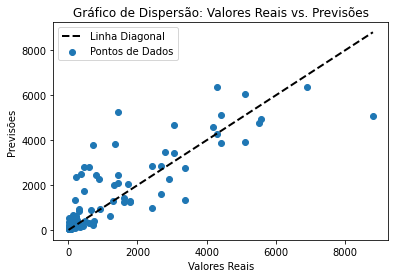

In [0]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, label="Pontos de Dados")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Linha Diagonal")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs. Previsões")
plt.legend()
plt.show()

